Two sigma investments data analysis

In [1]:
import pandas as pd
from datetime import datetime


path = "/Users/xiaolin/Desktop/dataAnalysis/kaggle/twoSigma/train.h5"

#read data
df_origin=pd.read_hdf(path)

#change datatype of timestamp
df_origin['timestamp_detail']=df_origin['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

df_origin.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,timestamp_detail
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753,1970-01-01 08:00:00
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240,1970-01-01 08:00:00
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940,1970-01-01 08:00:00
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959,1970-01-01 08:00:00
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338,1970-01-01 08:00:00


In [15]:
print(df_origin.shape)

(1710756, 112)


In [19]:
# 检查column的意义
# id 设备号；timestamp 时间戳； derived 推导；fundamental基本的；technical技术的；
# 设备号 = 投资类型？ 标的？ 共2158 个；
# 我们的理解：通过分析2158个股票的各种指标（交易时间，基本面，技术指标等）来预测市场的走向

股票的时间长度: 1646
股票的时间长度: 116
股票的时间长度: 1813


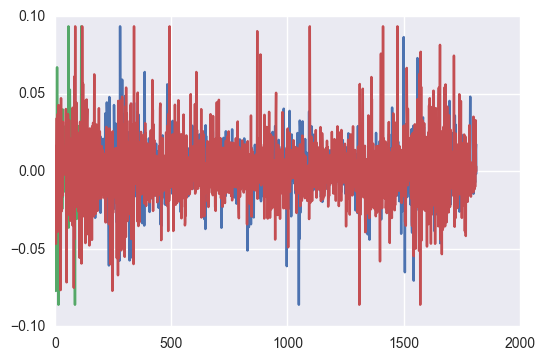

时间戳是否连续检验


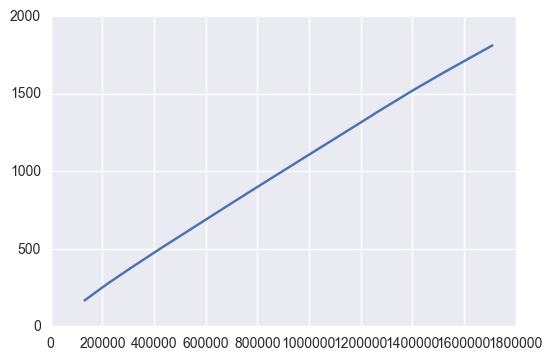

In [24]:
# 目标变量y的分布
% matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


# 随机验证了第 0 ，第10， 第25支股票的分布
plt.figure()
#分析单独一支股票的走势
df_0=df_origin[df_origin["id"]==0]
#绘制单独一支股票随时间的走势
x=df_0[["timestamp"]]
y=df_0[["y"]]
print("股票的时间长度:",len(x))
plt.plot(x,y)
# plt.show()

#analysis  another stcoker
df_10=df_origin[df_origin["id"]==10]
#绘制单独一支股票随时间的走势
x=df_10[["timestamp"]]
y=df_10[["y"]]
print("股票的时间长度:",len(x))
plt.plot(x,y)
# plt.show()

#analysis  another stcoker
df_25=df_origin[df_origin["id"]==25]
#绘制单独一支股票随时间的走势
x=df_25[["timestamp"]]
y=df_25[["y"]]
print("股票的时间长度:",len(x))
plt.plot(x,y)
plt.show()


#分析单独一支股票的走势
df_0=df_origin[df_origin["id"]==0]
#绘制单独一支股票随时间的走势
x=df_0[["timestamp"]]
y=df_0[["y"]]
print("时间戳是否连续检验")
plt.plot(x)
plt.show()

使用ARMA模型

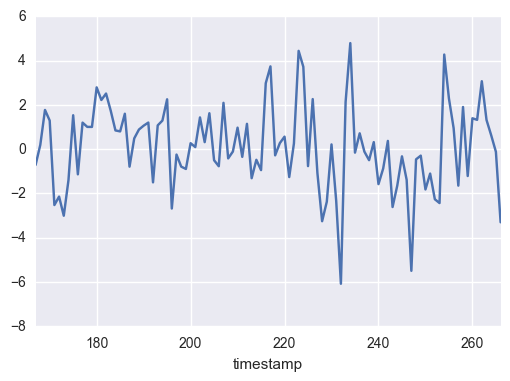

In [30]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
#由于数据量太大，我们先测试其中的 前100的数据
data=df_0["y"][:100]*100
data.index=df_0["timestamp"][:100]
data=data.dropna()
data.plot()

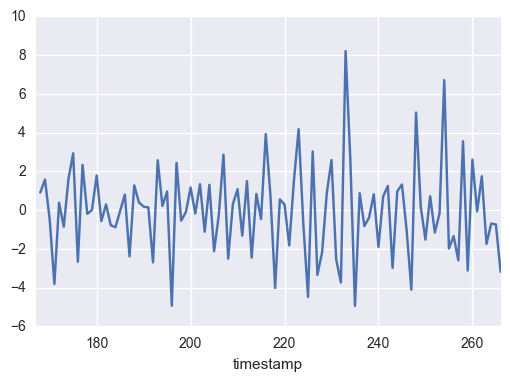

In [31]:
#绘制差分图
diff=data.diff(1)
diff.plot()

/Users/xiaolin/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'没有拖尾或截尾，表明有不能忽略的相关性'

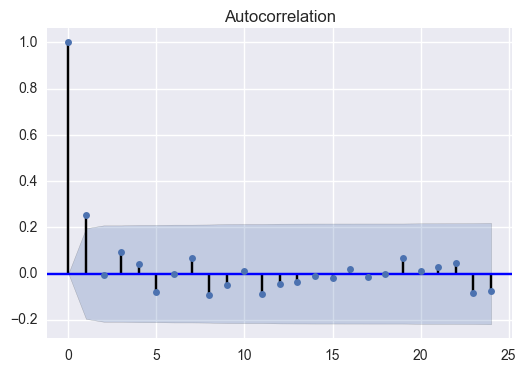

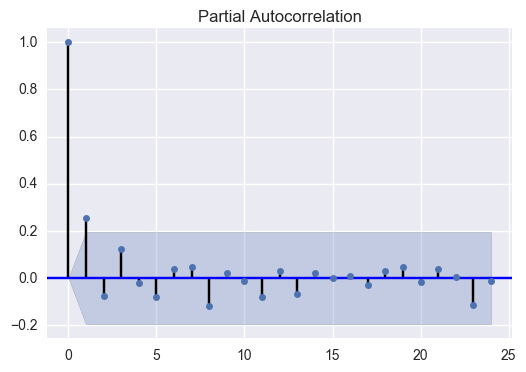

In [32]:
#绘制自相关图
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data,lags=24).show() #lags表示滞后的阶数
#绘制偏相关图
plot_pacf(data,lags=24).show()

'''没有拖尾或截尾，表明有不能忽略的相关性'''

# #绘制diff的自相关图和偏相关图
# plot_acf(diff,lags=10).show()
# plot_pacf(diff,lags=10).show()

In [33]:
# 首先需要把index转换成 含有时间的index
data.index=pd.to_datetime(data.index, unit='s')

arma_0=sm.tsa.ARMA(endog=data,order=(1,0)).fit()
print(arma_0.aic,arma_0.bic,arma_0.hqic) #打印赤池信息量 贝叶斯信息量 

arma_1=sm.tsa.ARMA(endog=data,order=(3,0)).fit()
print(arma_1.aic,arma_1.bic,arma_1.hqic)
      
arma_2=sm.tsa.ARMA(endog=data,order=(10,1)).fit()
print(arma_2.aic,arma_2.bic,arma_2.hqic)

arma_3=sm.tsa.ARMA(endog=data,order=(15,1)).fit()
print(arma_3.aic,arma_3.bic,arma_3.hqic)

413.5452462323189 421.36075679 416.708323987
415.37795021242863 428.403801142 420.649746471
427.4324556202294 461.299668038 441.139125891
436.0042118706645 482.897275218 454.9826784


/Users/xiaolin/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


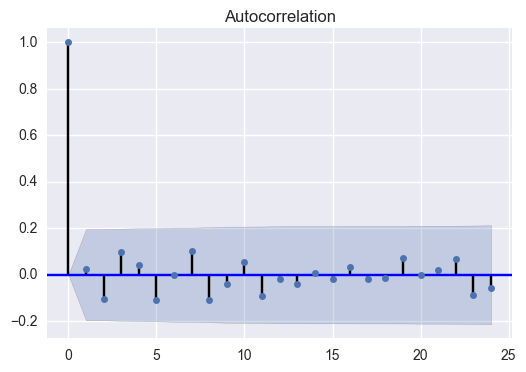

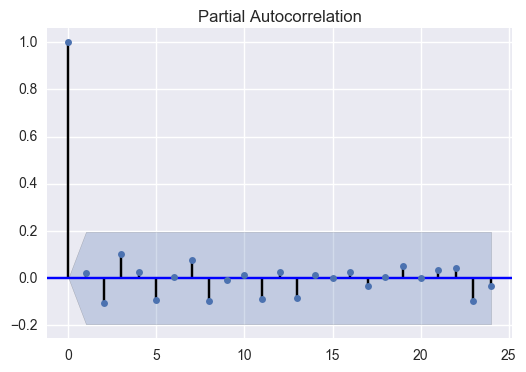

In [34]:
#计算ARMR(15,1)的残差
resid=arma_0.resid
#绘制自相关图
plot_acf(resid.values.squeeze(),lags=24).show() #lags表示滞后的阶数
#绘制偏相关图
plot_pacf(resid,lags=24).show()

In [35]:
#D-W检验 检验一阶自相关
# DW=0 正相关
# DW=2 不相关 不存在一阶相关性
# DW=4 负相关
print(sm.stats.durbin_watson(arma_0.resid.values))

1.92030839948


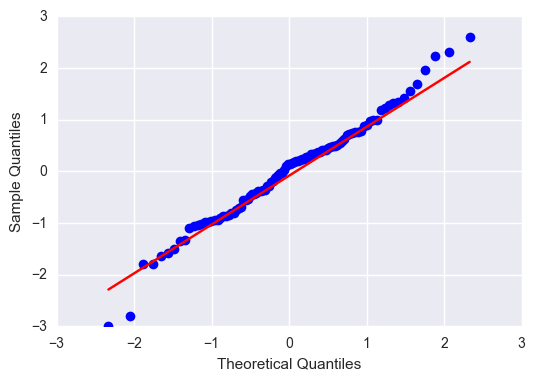

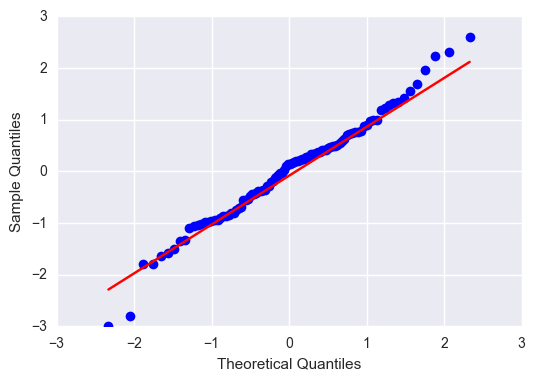

In [36]:
#绘制QQ图
qqplot(resid,line="q",fit=True)

In [37]:
#Ljung-Box 检验
#用来检测高斯噪声，最后一列的值应该大于0.05或0.10的假设值
import numpy as np

r,q,p=sm.tsa.acf(resid.values.squeeze(),qstat=True)
data_2=np.c_[range(1,41),r[1:],q,p]
table=pd.DataFrame(data_2,columns=["lag","AC","Q","Prob（>Q）"])
print(table.set_index("lag"))

            AC          Q  Prob（>Q）
lag                                
1.0   0.022663   0.052919  0.818060
2.0  -0.104309   1.185368  0.552842
3.0   0.097228   2.179420  0.536013
4.0   0.040781   2.356120  0.670571
5.0  -0.109305   3.638906  0.602481
6.0   0.000834   3.638982  0.725396
7.0   0.100065   4.737175  0.692001
8.0  -0.107563   6.019905  0.645002
9.0  -0.038183   6.183323  0.721440
10.0  0.054746   6.522991  0.769579
11.0 -0.091021   7.472480  0.759633
12.0 -0.017532   7.508108  0.822293
13.0 -0.040418   7.699638  0.862603
14.0  0.005966   7.703860  0.904177
15.0 -0.016453   7.736345  0.933917
16.0  0.033308   7.871059  0.952613
17.0 -0.017974   7.910761  0.968418
18.0 -0.014973   7.938646  0.979536
19.0  0.072935   8.608513  0.979432
20.0 -0.000688   8.608573  0.987013
21.0  0.020822   8.664552  0.991617
22.0  0.066643   9.245328  0.991954
23.0 -0.086762  10.242486  0.989675
24.0 -0.055838  10.660937  0.991232
25.0  0.036188  10.839038  0.993697
26.0 -0.016271  10.875528  0

DatetimeIndex(['1970-01-01 00:04:22', '1970-01-01 00:04:23',
               '1970-01-01 00:04:24', '1970-01-01 00:04:25'],
              dtype='datetime64[ns]', name='timestamp', freq=None) 100
1970-01-01 00:04:27   -0.790734
1970-01-01 00:04:28   -0.134492
1970-01-01 00:04:29    0.037133
1970-01-01 00:04:30    0.082018
1970-01-01 00:04:31    0.093756
1970-01-01 00:04:32    0.096826
Freq: S, dtype: float64


/Users/xiaolin/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


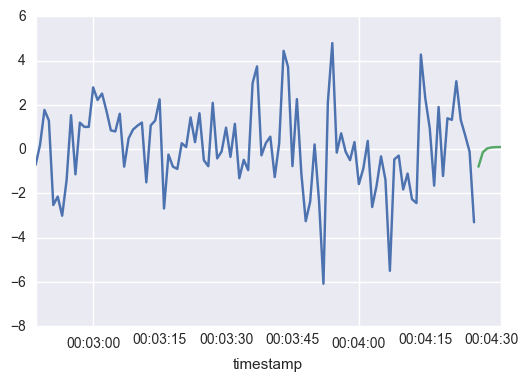

In [53]:
#模型的预测

print(data.index[-5:-1],len(data))
predict=arma_0.predict(start=100,end=105,dynamic=True)
print(predict)
fig,ax=plt.subplots()
ax=data.plot(ax=ax)
predict.plot(ax=ax)

使用SVR模型:支持向量机回归

In [241]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import BaggingRegressor

#对其中的某一支股票的特征做处理
#替换空值为平均值，因为中位数值没有
df_01=df_0.fillna(df_0.mean())
data_01=df_01.ix[:,2:-2] #去除时间戳变量
y = df_01.ix[:,-2].apply(lambda x:x*100) # 由于目标Y的变化太小了，故扩大100倍来提高准确度；

In [245]:
#归一化特征数据
from sklearn import preprocessing

min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
data_02=min_max_scaler.fit_transform(data_01)

#切分数据
data_trn,data_tst,y_trn,y_tst= train_test_split(data_02,y,test_size=0.02)

#训练数据 预测结果 评估R^2
svr=svm.SVR(C=500)
svr.fit(data_trn,y_trn)
y_pre=svr.predict(data_tst)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R^2 score:",svr.score(data_tst,y_tst),"越接近1，表明拟合的越好。")
print("R^2 score:",r2_score(y_tst,y_pre))
print("MSE 均方误差：",mean_squared_error(y_tst,y_pre),"越接近0越好。")
print(pd.DataFrame({"y_pre":list(y_pre),"y_tst":list(y_tst)}).head(10))

R^2 score: -0.100906209361 越接近1，表明拟合的越好。
R^2 score: -0.100906209361
MSE 均方误差： 2.31398474766 越接近0越好。
      y_pre     y_tst
0 -0.537031  0.101503
1 -0.193054  0.359811
2  1.119421 -0.015324
3 -0.582044 -2.360218
4 -0.170147 -1.098017
5 -0.245226 -0.163090
6 -0.496849  3.353543
7 -0.120631  0.429969
8  0.014869  0.117826
9 -0.096926  0.631549


In [246]:
# 使用RFR回归
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=100,random_state=50)
rfr.fit(data_trn,y_trn)
y_pre=rfr.predict(data_tst)

print("R^2 score:",r2_score(y_tst,y_pre))
print("MSE 均方误差：",mean_squared_error(y_tst,y_pre),"越接近0越好。")
print(pd.DataFrame({"y_pre":list(y_pre),"y_tst":list(y_tst)}).head(10))

R^2 score: -0.287973657428
MSE 均方误差： 2.7071801152 越接近0越好。
      y_pre     y_tst
0 -0.090645  0.101503
1 -0.617162  0.359811
2  0.727976 -0.015324
3 -0.454217 -2.360218
4 -0.262436 -1.098017
5 -0.383309 -0.163090
6  0.016098  3.353543
7  0.138200  0.429969
8  0.058260  0.117826
9 -0.046285  0.631549


变量的相关性分析

In [250]:
df_0.ix[:,2:7].corr()

,derived_0,derived_1,derived_2,derived_3,derived_4
derived_0,1.000000,0.217054,-0.084296,-0.693382,0.242161
derived_1,0.217054,1.000000,0.581792,-0.641808,-0.427662
derived_2,-0.084296,0.581792,1.000000,-0.087756,-0.222020
derived_3,-0.693382,-0.641808,-0.087756,1.000000,-0.003641
derived_4,0.242161,-0.427662,-0.222020,-0.003641,1.000000


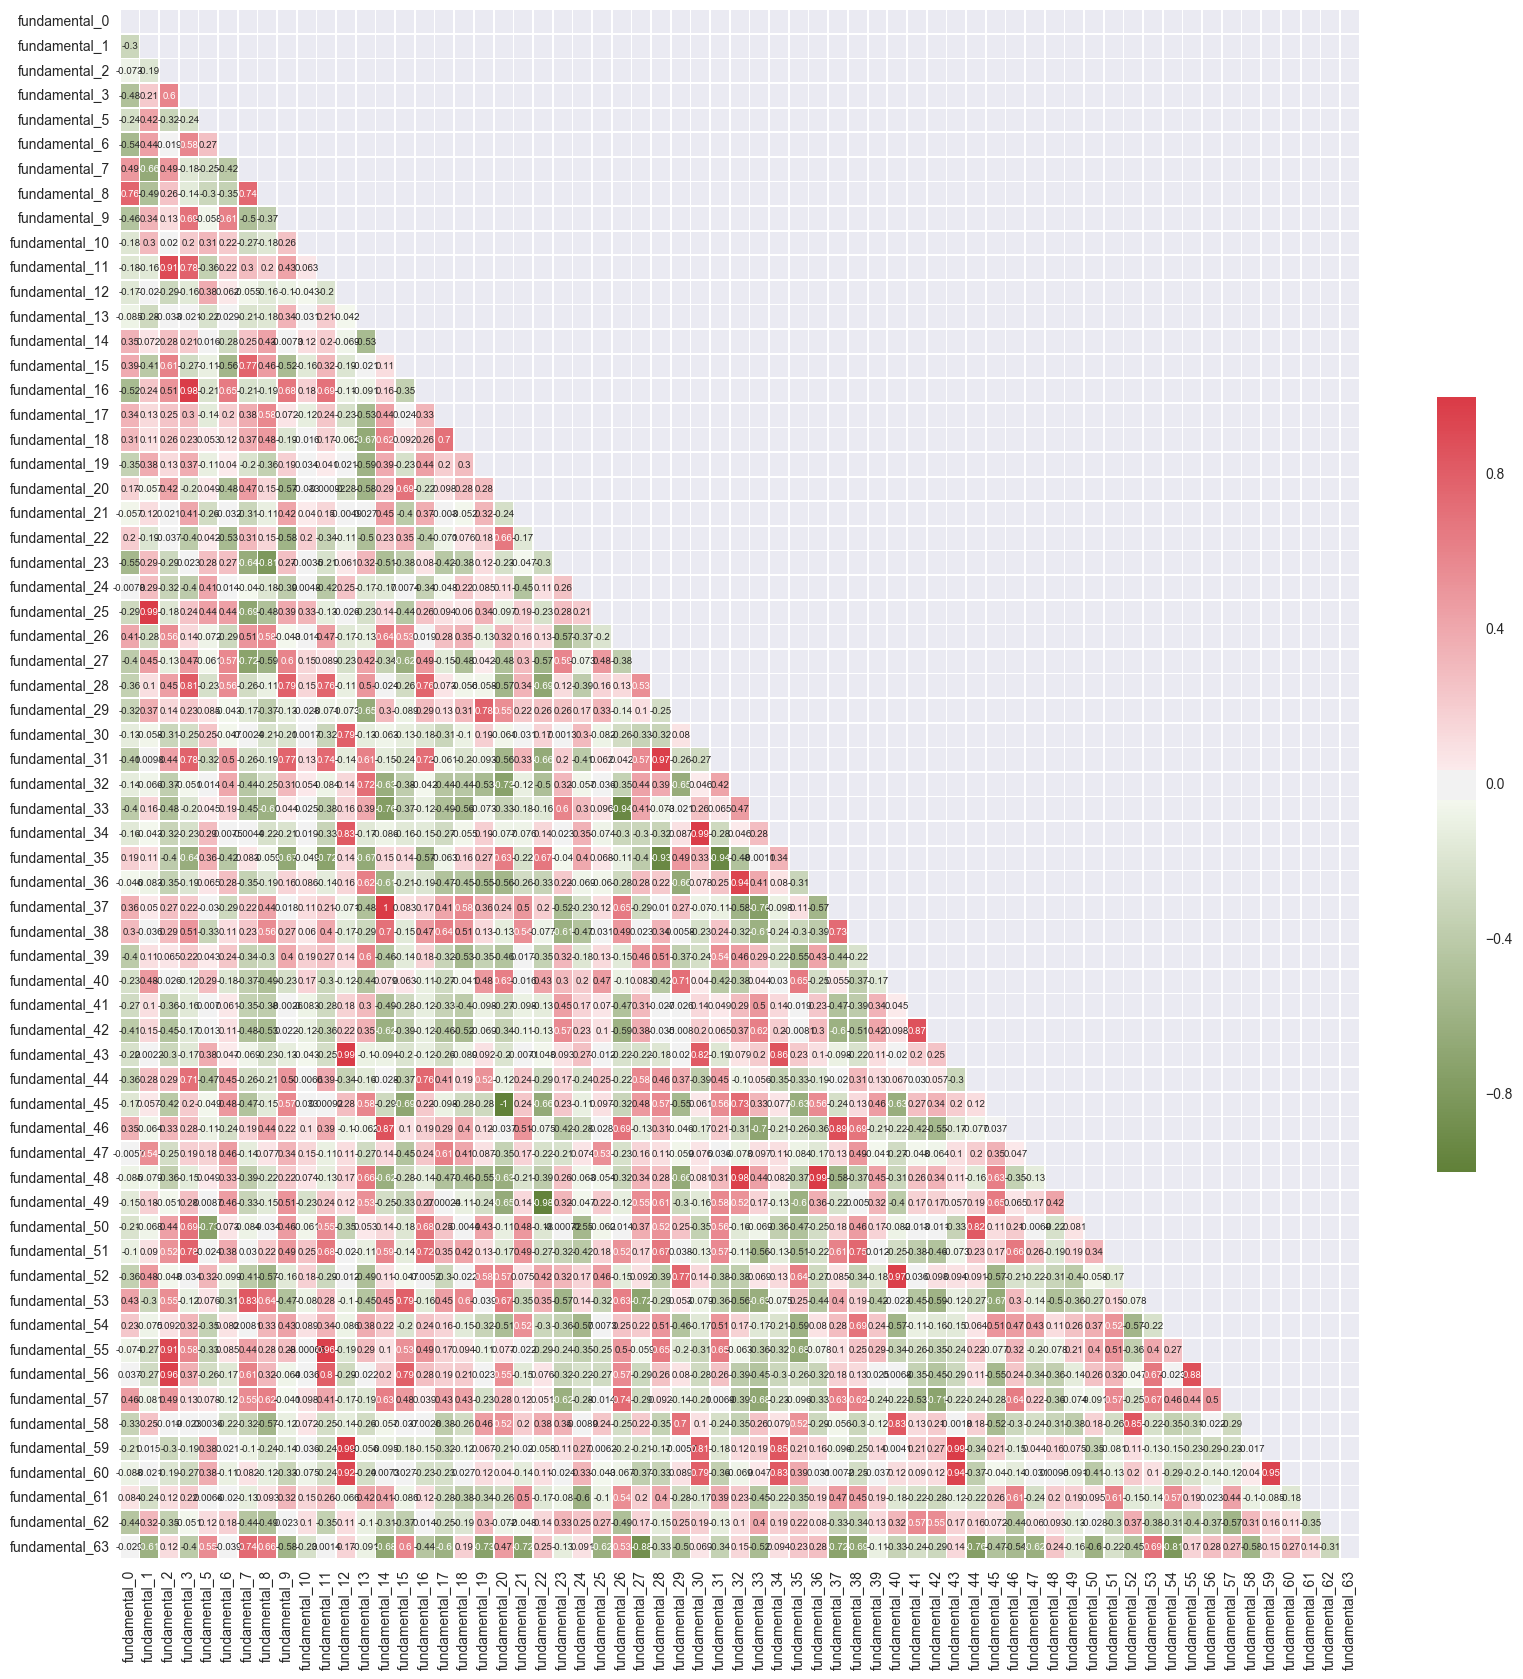

In [270]:
corr=df_0.ix[:,7:70].corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,20))
cmap=sns.diverging_palette(110,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,linewidths=0.5,cbar_kws={"shrink":0.5},annot=True,annot_kws={"size":7})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
# corr

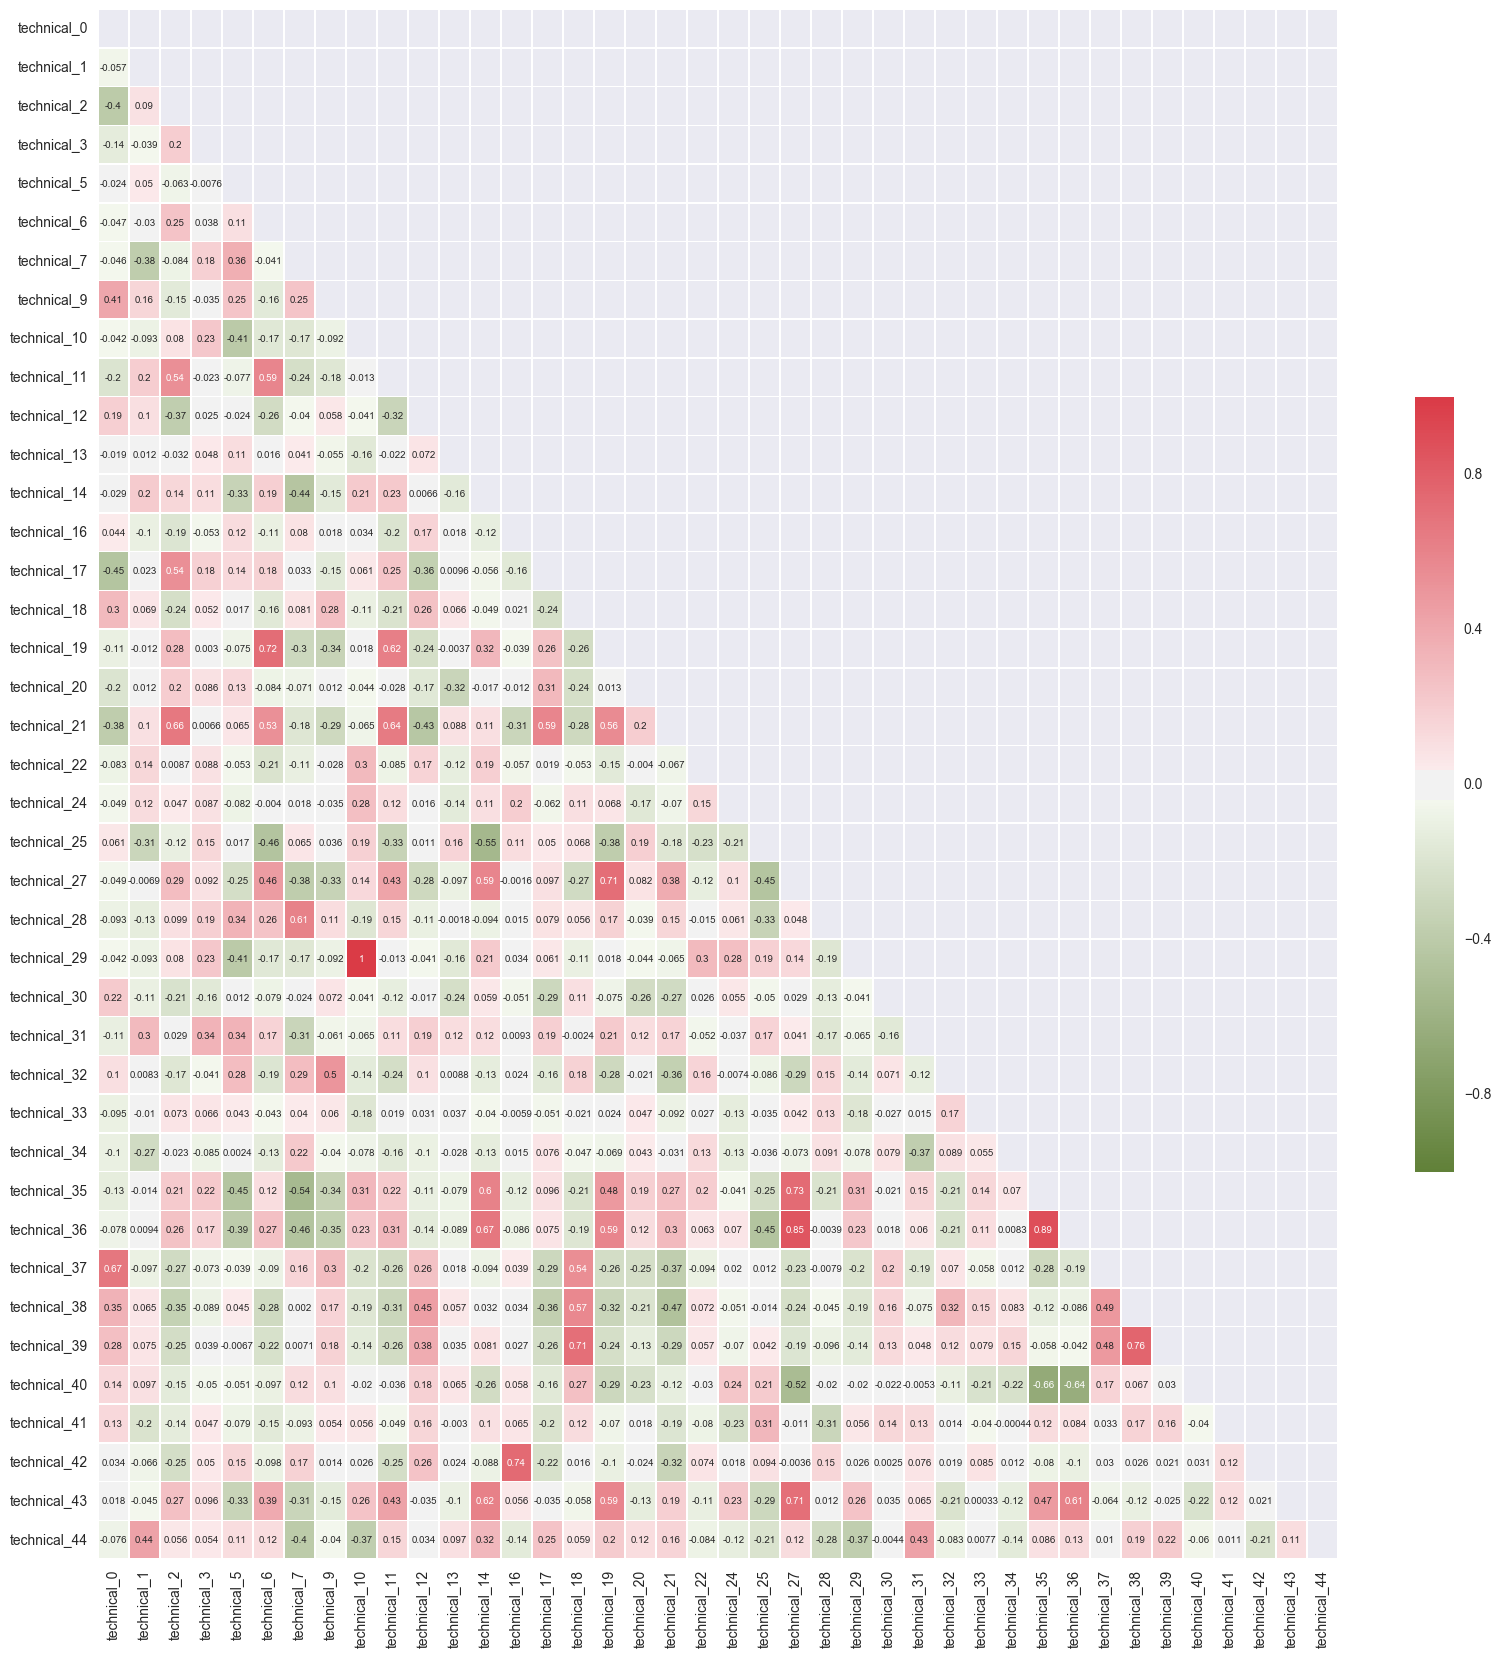

In [300]:
corr=df_0.ix[:,70:-2].corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,20))
cmap=sns.diverging_palette(110,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,linewidths=0.5,cbar_kws={"shrink":0.5},annot=True,annot_kws={"size":7})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

计算 不同ID之间的Y随时间走势的相似度计算

In [11]:
IDY=df_origin[["id","timestamp","y"]] 
ids=IDY["id"].drop_duplicates()  #id去重
df_temp=pd.DataFrame()
# for i in ids: 
#     tst=IDY[IDY["id"]==i]
#     tst[["y"]].index=tst[["timestamp"]]
#     newtst=tst[["y"]].transpose()
#     newtst.index=[i]
#     df_temp=pd.concat([newtst,df_temp])

#计算量比较大，我们以部分ID的分布为例子
#测试ID=0
tst=IDY[IDY["id"]==0]
tst[["y"]].index=tst[["timestamp"]]
newtst_0=tst[["y"]].transpose()
newtst_0.index=[0]
newtst_0

,131062,131895,132728,133561,134393,135224,136055,136885,137715,138545,...,1699912,1700996,1702080,1703164,1704248,1705332,1706416,1707500,1708584,1709670
0,-0.007108,0.00195,0.017724,0.012934,-0.025229,-0.021411,-0.030042,-0.013961,0.01533,-0.011354,...,0.000646,-0.007014,0.008276,-0.004655,-0.007162,0.005913,0.001084,0.014193,0.017506,-0.001499


In [15]:
#测试ID=0
tst=IDY[IDY["id"]==20]
tst[["y"]].index=tst[["timestamp"]]
newtst_10=tst[["y"]].transpose()
newtst_10.index=[0]
newtst_10

,131066,131899,132732,133565,134397,135228,136059,136889,137719,138549,...,1699924,1701008,1702092,1703176,1704260,1705344,1706428,1707512,1708596,1709682
0,-0.016108,0.017685,0.007213,-0.019017,-0.019057,-0.006577,-0.018562,-0.02222,-0.013356,0.005723,...,-0.000491,-0.005586,-0.006439,0.005936,0.005731,-0.007396,-0.008863,0.018208,0.024028,-0.001788


In [16]:
#计算相关性
#检测长度
print(newtst_0.shape,newtst_10.shape)
np.corrcoef(np.array(newtst_0).ravel(),np.array(newtst_10).ravel())

(1, 1646) (1, 1646)


array([[ 1.        ,  0.19204961],
       [ 0.19204961,  1.        ]])

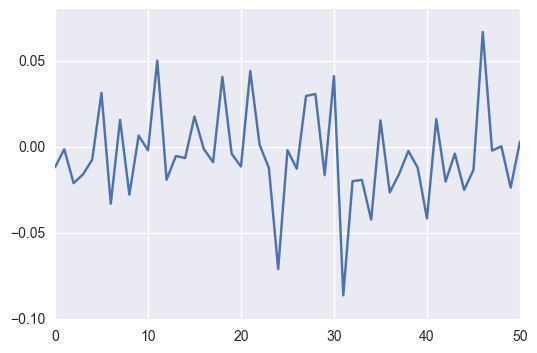

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline 

plt.plot(df_origin[["y"]].ix[:50,:])